# SVM実装
## 参照元　総務省　https://www.stat.go.jp/teacher/comp-learn-04.html

### 1.ライブラリのインポート

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions   # anacondaにはない

### 2. データの読み込みと確認

In [2]:
df = pd.read_csv("data/SVM.csv", index_col=0)
df.head()

,months,falls,sex,age,past_falls,crack,width,height,thick,cover,ring
ID,,,,,,,,,,,
1,38,0,1,10,0,0,60,140,7,1,0
2,23,0,2,10,0,0,60,140,7,1,1
3,3,2,1,10,1,1,64,131,7,0,0
4,30,0,1,10,0,1,71,146,7,0,1
5,15,0,1,10,0,0,78,160,7,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 39
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   months      39 non-null     int64
 1   falls       39 non-null     int64
 2   sex         39 non-null     int64
 3   age         39 non-null     int64
 4   past_falls  39 non-null     int64
 5   crack       39 non-null     int64
 6   width       39 non-null     int64
 7   height      39 non-null     int64
 8   thick       39 non-null     int64
 9   cover       39 non-null     int64
 10  ring        39 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


In [4]:
df.describe()

,months,falls,sex,age,past_falls,crack,width,height,thick,cover,ring
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,20.025641,0.692308,1.538462,10.794872,0.384615,0.307692,71.179487,146.333333,7.512821,0.564103,0.435897
std,12.020787,1.004040,0.505035,4.963973,0.492864,0.467572,5.009842,8.796929,0.683328,0.502356,0.502356
min,2.000000,0.000000,1.000000,10.000000,0.000000,0.000000,60.000000,131.000000,7.000000,0.000000,0.000000
25%,8.500000,0.000000,1.000000,10.000000,0.000000,0.000000,69.000000,142.000000,7.000000,0.000000,0.000000
50%,19.000000,0.000000,2.000000,10.000000,0.000000,0.000000,71.000000,146.000000,7.000000,1.000000,0.000000
75%,29.500000,1.000000,2.000000,10.000000,1.000000,1.000000,75.000000,151.000000,8.000000,1.000000,1.000000
max,38.000000,4.000000,2.000000,41.000000,1.000000,1.000000,78.000000,160.000000,9.000000,1.000000,1.000000


In [5]:
df.columns

Index(['months', 'falls', 'sex', 'age', 'past_falls', 'crack', 'width',
       'height', 'thick', 'cover', 'ring'],
      dtype='object')

In [6]:
columns_list = ["months", "falls", "crack", "width", "height", "thick", "cover"]

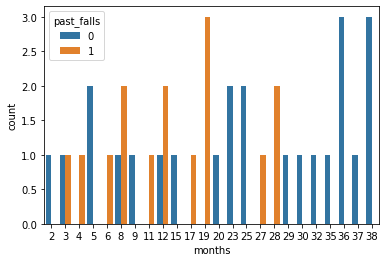

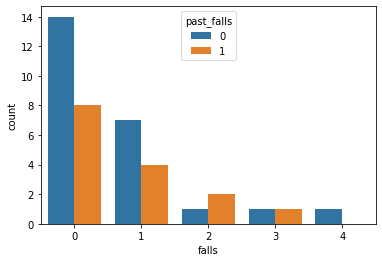

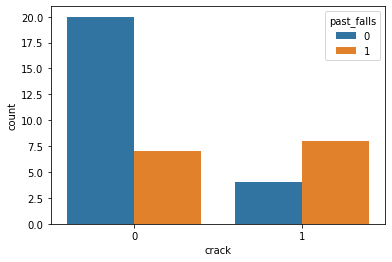

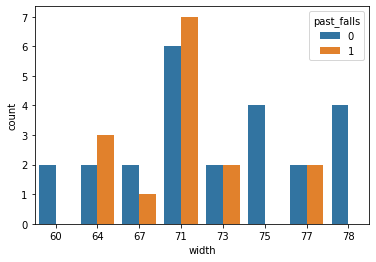

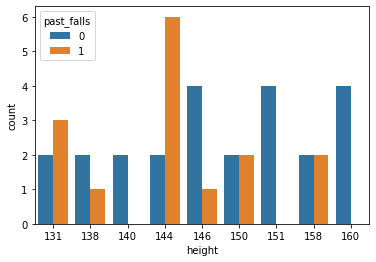

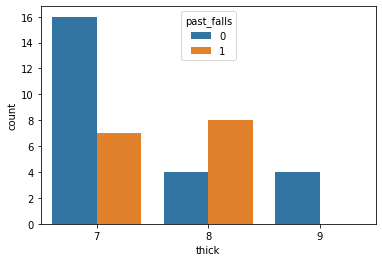

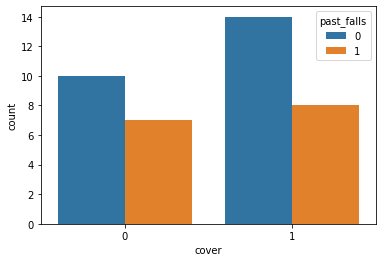

In [7]:
for column in columns_list:
    sns.countplot(x=column, hue="past_falls", data= df)
    plt.show()

In [8]:
df[columns_list].values

array([[ 38,   0,   0,  60, 140,   7,   1],
       [ 23,   0,   0,  60, 140,   7,   1],
       [  3,   2,   1,  64, 131,   7,   0],
       [ 30,   0,   1,  71, 146,   7,   0],
       [ 15,   0,   0,  78, 160,   7,   0],
       [ 36,   1,   0,  64, 131,   7,   1],
       [  5,   1,   1,  71, 146,   7,   0],
       [  5,   0,   1,  78, 160,   7,   1],
       [ 36,   1,   0,  67, 138,   7,   1],
       [ 35,   1,   0,  77, 158,   8,   1],
       [ 32,   0,   0,  71, 144,   8,   1],
       [ 38,   0,   0,  71, 144,   8,   1],
       [ 12,   2,   0,  73, 150,   7,   1],
       [  8,   0,   1,  73, 150,   7,   0],
       [  8,   0,   0,  71, 144,   8,   1],
       [ 28,   0,   1,  71, 144,   8,   0],
       [ 37,   0,   0,  73, 150,   7,   0],
       [  2,   1,   0,  73, 150,   7,   0],
       [ 36,   1,   0,  75, 151,   9,   1],
       [ 25,   1,   0,  75, 151,   9,   1],
       [ 28,   0,   1,  71, 144,   8,   0],
       [ 19,   1,   0,  71, 144,   8,   1],
       [ 38,   0,   0,  75, 151,

### 3. モデル構築

In [12]:
X = df[columns_list].values
Y = df["past_falls"].values

In [13]:
# 学習用と検証用とでデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

# データの標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
# 主成分分析（PCA）を使用して、現状の７次元の特徴量を２つへ次元圧縮する。
pca = PCA(n_components=2)
X_train_std2 = pca.fit_transform(X_train_std)
X_test_std2 = pca.fit_transform(X_test_std)
print(X_train_std.shape, X_train_std2.shape)

(27, 7) (27, 2)


In [15]:
# model構築
model1 = SVC(kernel="linear")
model2 = SVC(kernel="rbf")

model1.fit(X_train_std2, Y_train)
model2.fit(X_train_std2, Y_train)

SVC()

### 4. 分類結果の可視化

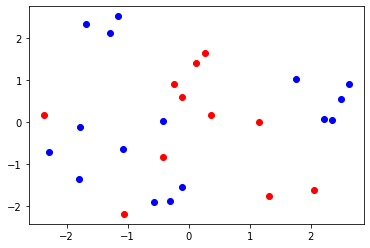

In [25]:
plt.plot(X_train_std2[Y_train == 1, 0], X_train_std2[Y_train == 1, 1], "ro")
plt.plot(X_train_std2[Y_train == 0, 0], X_train_std2[Y_train == 0, 1], "bo")
plt.show()

/home/studio-lab-user/.conda/envs/ken_lgbm/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


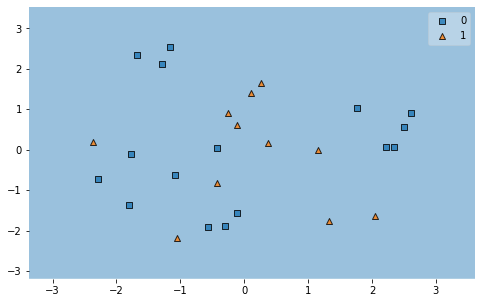

In [26]:
# 線形カーネルの結果
fig = plt.figure(figsize=(8,5))
plot_decision_regions(X_train_std2, Y_train, clf = model1)
plt.show()

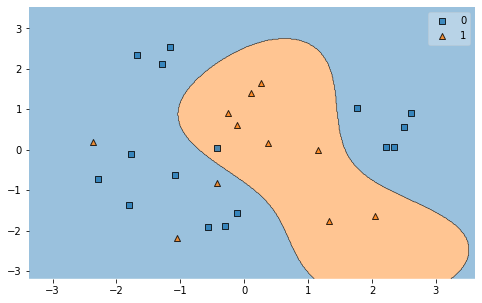

In [27]:
# rbfカーネルの結果
fig = plt.figure(figsize=(8,5))
plot_decision_regions(X_train_std2, Y_train, clf = model2)
plt.show()

### 5. モデル評価

In [34]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [29]:
#予測
pre1 = model1.predict(X_test_std2)
pre2 = model2.predict(X_test_std2)

In [35]:
# 正解率
ac_score1 = metrics.accuracy_score(Y_test, pre1)
ac_score2 = metrics.accuracy_score(Y_test, pre2)
print(f"ac_score1(linear) = {ac_score1:.3f}, ac_score2(rbf) = {ac_score2:.3f}")

# 適合率
precision1 = precision_score(Y_test, pre1)
precision2 = precision_score(Y_test, pre2)
print(f"precision1(linear) = {precision1:.3f}, precision2(rbf) = {precision2:.3f}")

# 再現率
recall1 = recall_score(Y_test, pre1)
recall2 = recall_score(Y_test, pre2)
print(f"recall1(linear) = {recall1:.3f}, recall2(rbf) = {recall2:.3f}")

# F値
f_m1 = f1_score(Y_test, pre1)
f_m2 = f1_score(Y_test, pre2)
print(f"f_m1(linear) = {f_m1:.3f}, f_m2(rbf) = {f_m2:.3f}")

ac_score1(linear) = 0.667, ac_score2(rbf) = 0.750
precision1(linear) = 0.000, precision2(rbf) = 1.000
recall1(linear) = 0.000, recall2(rbf) = 0.250
f_m1(linear) = 0.000, f_m2(rbf) = 0.400


/home/studio-lab-user/.conda/envs/ken_lgbm/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
